# GO-term analysis

TF-COMB contains functionality for performing GO-term analysis on gene lists as obtained e.g. from TFBS annotation.

## Obtain a list of genes from previous analysis

We will use a gene list containing genes upregulated in response to hypoxia (source msigdb: https://www.gsea-msigdb.org/gsea/msigdb/cards/HALLMARK_HYPOXIA.html)

In [1]:
with open("../data/gene_list.txt") as f:
    genes = f.read().split("\n")

In [2]:
genes[:10]

['ACKR3',
 'ADM',
 'ADORA2B',
 'AK4',
 'AKAP12',
 'ALDOA',
 'ALDOB',
 'ALDOC',
 'AMPD3',
 'ANGPTL4']

Given a list of genes, you can use the GOAnalysis class to perform a GO-term analysis of the genes:

In [3]:
from tfcomb.annotation import GOAnalysis
go_table = GOAnalysis().enrichment(genes)

INFO: Running GO-term enrichment for organism 'hsapiens' (taxid: 9606)
go-basic.obo: fmt(1.2) rel(2022-05-16) 47,071 GO Terms
HMS:0:00:05.707700 349,061 annotations, 20,717 genes, 18,963 GOs, 1 taxids READ: gene2go 
INFO: Setting up gene ids
INFO: Setting up GO enrichment

Load BP Gene Ontology Analysis ...
Propagating term counts up: is_a

Load CC Gene Ontology Analysis ...
Propagating term counts up: is_a

Load MF Gene Ontology Analysis ...
Propagating term counts up: is_a


The results are seen in the returned table:

In [4]:
go_table.head()

,GO,name,NS,depth,enrichment,ratio_in_study,ratio_in_pop,p_uncorrected,p_fdr_bh,study_count,study_items
36,GO:0005996,monosaccharide metabolic process,BP,4,increased,35/200,174/19351,2.699871e-07,0.000111,35,"ALDOA, ALDOB, ALDOC, ATF3, BRS3, ENO1, ENO2, E..."
31,GO:0006091,generation of precursor metabolites and energy,BP,3,increased,32/200,365/19351,2.661620e-07,0.000111,32,"ALDOA, ALDOB, ALDOC, ENO1, ENO2, ENO3, GAA, GA..."
37,GO:0006006,glucose metabolic process,BP,6,increased,29/200,113/19351,2.737493e-07,0.000111,29,"ALDOC, ATF3, BRS3, ENO1, ENO2, ENO3, FBP1, GAA..."
11,GO:0016052,carbohydrate catabolic process,BP,4,increased,26/200,105/19351,1.366245e-07,0.000111,26,"ALDOA, ALDOB, ALDOC, ENO1, ENO2, ENO3, GAA, GA..."
21,GO:0009141,nucleoside triphosphate metabolic process,BP,7,increased,23/200,203/19351,2.011868e-07,0.000111,23,"AK4, ALDOA, ALDOB, ALDOC, ENO1, ENO2, ENO3, GA..."


## Plotting the enriched terms

The returned `go_table` is a subclass of pandas.DataFrame, which contains options for plotting the GO-enrichment results as seen here:

In [5]:
type(go_table)

tfcomb.annotation.GOAnalysis

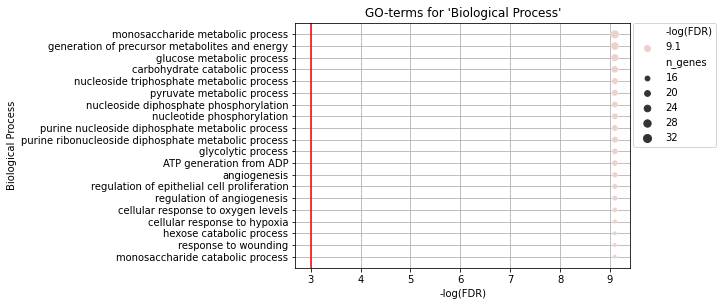

In [6]:
_ = go_table.plot_bubble()

The default aspect shown is "BP" (Biological Process), but by setting `aspect`, either of "CC" (Cellular Component) and "MF" (Molecular Function can be shown:

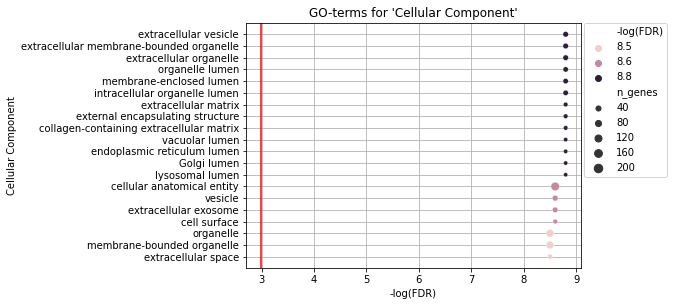

In [7]:
_ = go_table.plot_bubble(aspect="CC")

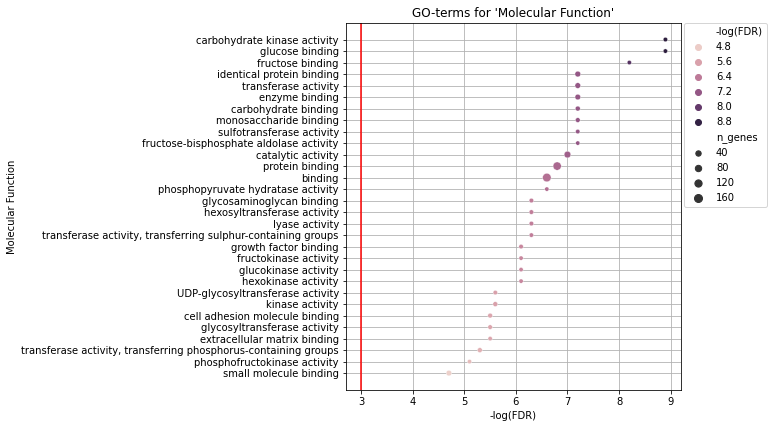

In [8]:
_ = go_table.plot_bubble(aspect="MF", n_terms=30)